In [33]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import numpy as np

In [2]:
store_data = pd.read_csv("store_data.csv", header = None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [4]:
records = []
for i in range(0, store_data.shape[0]):
    records.append([str(store_data.values[i,j]) for j in range(0, store_data.shape[1])])


In [7]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.shape

(7501, 121)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 121 entries,  asparagus to zucchini
dtypes: bool(121)
memory usage: 886.5 KB


In [9]:
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [10]:
#kiem tra du lieu null
df.isnull().any()

 asparagus           False
almonds              False
antioxydant juice    False
asparagus            False
avocado              False
                     ...  
whole wheat pasta    False
whole wheat rice     False
yams                 False
yogurt cake          False
zucchini             False
Length: 121, dtype: bool

In [11]:
df = df.drop(['nan'], axis = 1)

In [14]:
frequent_itemsets = apriori(df, min_support=0.03, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)


In [15]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric = "confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
2,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
3,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
4,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
5,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
6,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314


In [19]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold=1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823
1,(chocolate),(milk),0.163845,0.129583,0.032129,0.196094,1.513276,0.010898,1.082736
2,(mineral water),(frozen vegetables),0.238368,0.095321,0.035729,0.149888,1.572463,0.013007,1.064189
3,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
4,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672
5,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
6,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
7,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
8,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
9,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650


In [23]:
for row in rules.iterrows():
    if 'milk' in row[1][0]:
        print(row)

(0, antecedents                (milk)
consequents           (chocolate)
antecedent support       0.129583
consequent support       0.163845
support                  0.032129
confidence               0.247942
lift                      1.51328
leverage                0.0108976
conviction                1.11182
Name: 0, dtype: object)
(9, antecedents                    (milk)
consequents           (mineral water)
antecedent support           0.129583
consequent support           0.238368
support                     0.0479936
confidence                    0.37037
lift                          1.55377
leverage                    0.0171052
conviction                    1.20965
Name: 9, dtype: object)
(11, antecedents                (milk)
consequents           (spaghetti)
antecedent support       0.129583
consequent support        0.17411
support                 0.0354619
confidence               0.273663
lift                      1.57178
leverage                0.0129003
conviction         

In [24]:
support = rules['support'].values
confidence = rules['confidence'].values
lift = rules['lift'].values

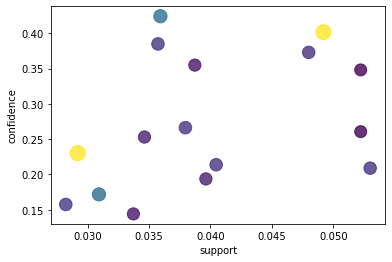

In [25]:
import random
import matplotlib.pyplot as plt
for i in range(len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5)
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
plt.scatter(support, confidence, s= lift*100, alpha=0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [26]:
result = df.apply(pd.value_counts).fillna(0)
result

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
False,7500,7348,7434,7466,7251,7467,7436,7420,7394,7432,...,7032,7308,7498,7377,7431,7280,7062,7415,7296,7430
True,1,153,67,35,250,34,65,81,107,69,...,469,193,3,124,70,221,439,86,205,71


In [27]:
df_true = result.iloc[1,:]
df_true[:10]

 asparagus             1
almonds              153
antioxydant juice     67
asparagus             35
avocado              250
babies food           34
bacon                 65
barbecue sauce        81
black tea            107
blueberries           69
Name: True, dtype: int64

In [30]:
x = df_true.sort_values(ascending=False)

In [31]:
ten_product = x[:10]
ten_product

mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
Name: True, dtype: int64

In [35]:
pos = np.array(len(ten_product.values))
print(pos)

10


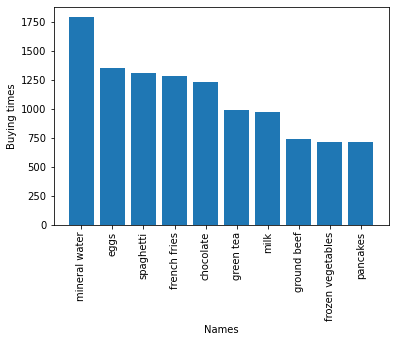

In [48]:
import matplotlib.pyplot as plt
plt.bar( ten_product.keys(),ten_product.values, align='center')
plt.xticks(rotation = 'vertical')
plt.ylabel("Buying times")
plt.xlabel("Names")
plt.show()